<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Start by importing libraries
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
import pandas
import plotly.graph_objects as go
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

# Setting random seed to 0
np.random.seed(0)

Question 1

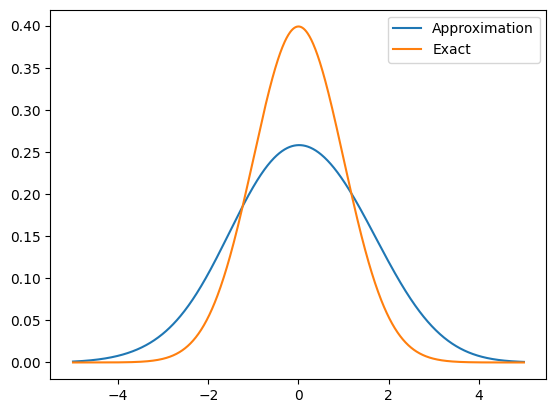

In [30]:
# Getting 40 samples from the mean 0 std 1 normal distribution
samples = np.random.normal(0, 1, [40, 1])

# Fitting Parzen windows to estimate the distribution
kde = KernelDensity(kernel = 'gaussian', bandwidth = 1).fit(samples)

# Creating an array of test points
x_sample = np.linspace(-5, 5, 1000)
# Generationg probability values for these test points, we are using exponential as the score_samples
# function returns log probabilities and reshape as it requires a 2D array
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
Analyticp = (1 / (np.sqrt(2 * np.pi) * 1)) * np.exp(-(((x_sample) / 1) ** 2)/2)

# Plotting
fig1, ax1 = plt.subplots()
plt.plot(x_sample, p, label = 'Approximation')
plt.plot(x_sample, Analyticp, label = 'Exact')
plt.legend()


Above we have used Parzen windows to approximate a normal distribution using various bandwidths and kernel functions. We have plotted alongside the analytic version of the function to check the accuracy of the approximation.

Question 2

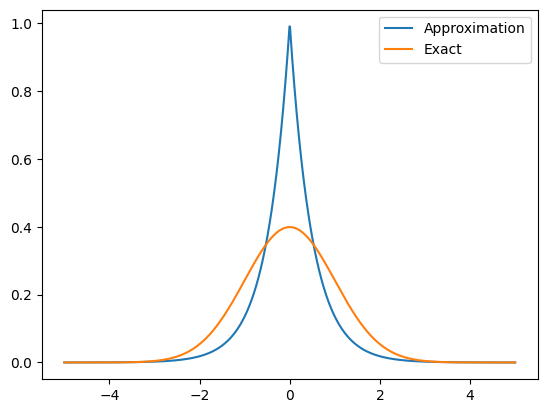

In [36]:
# Fitting with a single point
kde2 = KernelDensity(kernel = 'exponential', bandwidth = 0.5).fit(np.zeros([1, 1]))
p_sing = np.exp(kde2.score_samples(x_sample.reshape(len(x_sample), -1)))

# Plotting
fig2, ax2 = plt.subplots()
plt.plot(x_sample, p_sing, label = 'Underlying window')
plt.plot(x_sample, Analyticp, label = 'Exact')
plt.legend()

Above we have plotted the underlying window generated from a single point input to the kernel density function.

Question 3

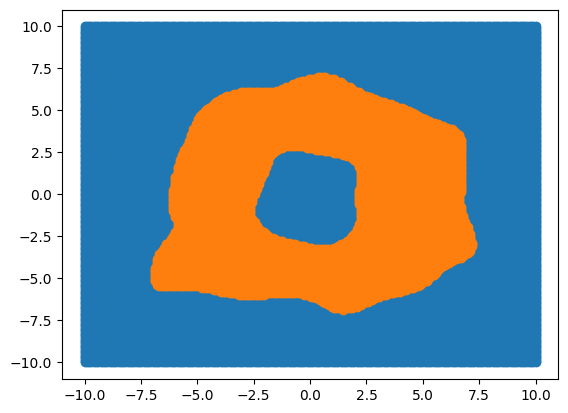

In [60]:
# Importing the circular distribution function
def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y

# Generating a 200 point circular distribution
X, y = gen_circular_distribution(200)
# Splitting based on classification
X1 = X[y==0, :]
X2 = X[y==1, :]

# Fitting both of these with a kernel density function using a Gaussian window and a bandwidth of 1
kde3A = KernelDensity(kernel = 'gaussian', bandwidth = 1).fit(X1)
kde3B = KernelDensity(kernel = 'gaussian', bandwidth = 1).fit(X2)

# Defining an image grid from -10 to 10
x1line = np.linspace(-10, 10, 200)
x2line = np.linspace(-10, 10, 200)
X1grid, X2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([X1grid, X2grid]).reshape([2, 200*200]).T

# Sampling the probability for each sample in the grid
p_circleA = np.exp(kde3A.score_samples(Xgrid.reshape(len(Xgrid), -1)))
p_circleB = np.exp(kde3B.score_samples(Xgrid.reshape(len(Xgrid), -1)))

# Plotting
fig3, ax3 = plt.subplots()
plt.scatter(Xgrid[p_circleA>p_circleB, 0], Xgrid[p_circleA>p_circleB, 1])
plt.scatter(Xgrid[p_circleA<p_circleB, 0], Xgrid[p_circleA<p_circleB, 1])

Above we have generated a circular distribution then split it based on it's classification and generated a kernel density function for both classes. We have then used these functions to generate probabilites of all points in a 200x200 grid of which class they fall into and then plotting based on which class the probabilities predict them to be in.

Question 4

In [ ]:
# Generate 5 points, with independent normal distributions in both
# x1 and x3 and label them 1-5
n_points = 5
X = np.random(0, 3, [n_points, 2])
y = np.array(range(n_points))+0

# Plot the points
fig4, ax4 = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = 'b')

# Define a test point at which we will calculate the nearest neighbour
x_test = np.array([5, -2])

# Make a function to get the nearest neighbour
def which_nearest(x_test, X):
  # get size
  n_points, n_dims = X.shape
  # This will contain the shortest distance - set to infinity to start
  shortest_distance = float('inf')
  # This will identify the closest point
  which_point = -1

  for point_cnt in range(n_points):

